# 5. Графические возможности библиотеки Matplotlib

[→ Скачать ноутбук из скринкаста](https://lms.skillfactory.ru/assets/courseware/v1/4ebced959974fc2276d3361657af34f1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DS_2_5_Visualizaion_Matplotlib.ipynb)

✍ Настало время сделать визуальный анализ качественнее — переходим к библиотеке Matplotlib.

## НЕМНОГО О БИБЛИОТЕКЕ

[Matplotlib](https://matplotlib.org/) — это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

Для установки библиотеки введите в командную строку (или командную строку Anaconda) следующее:

``` python
pip install matplotlib
```
→ На самом деле мы с вами уже использовали Matplotlib — встроенная визуализация в Pandas полностью основана на данной библиотеке. Однако визуализация в Matplotlib не ограничивается только DataFrame: c помощью Matplotlib можно визуализировать любые последовательности (списки, словари, NumPy-массивы).

→ К тому же инструментарий библиотеки поможет вам расширить ваши возможности визуализации, управляя параметрами настройки графиков вручную.

За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках используется команда %matplotlib inline.



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

In [2]:
plt.style.use('default')


ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib:

![](img/dst3-u1-md13_5_1.png)

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

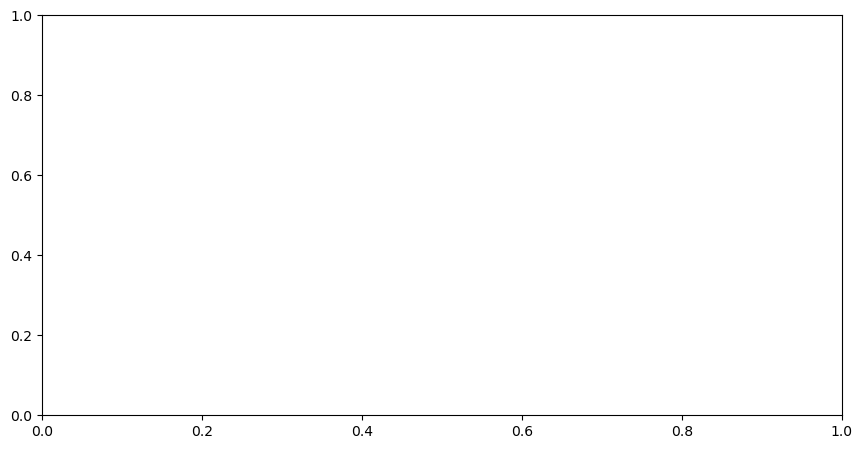

In [3]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])


Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html).

Основные параметры метода scatter()

- x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
- s — размер маркеров;
- marker — вид маркеров ('o' — точки, '^' — треугольники);
- c — цвет маркеров.

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

In [4]:
import pandas as pd

covid_df = pd.read_csv('data/covid_df.csv', sep=',')
covid_df['date'] = pd.to_datetime(covid_df['date'])


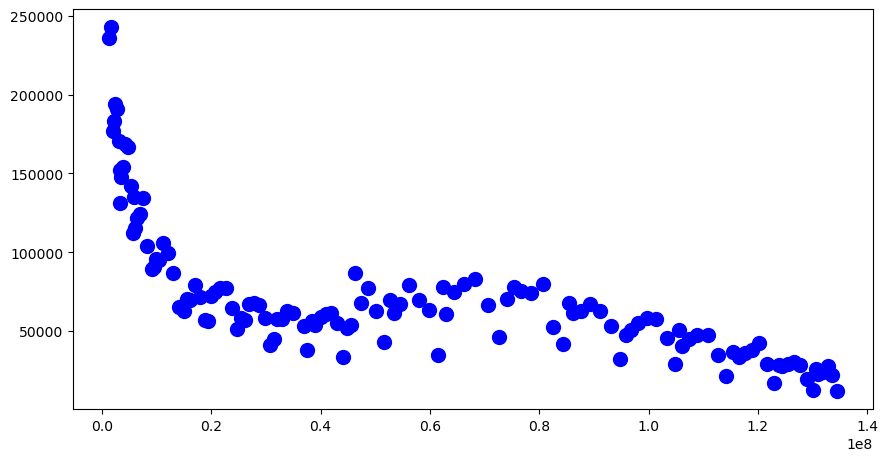

In [6]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c='blue'
)

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

Примечание. Обратите внимание, что под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.

Для построения круговых диаграмм в Matplotlib используется метод pie().

Кликните на плашку, чтобы увидеть информацию ↓

Основные параметры метода pie()

- x — значения, по которым будет строиться круговая диаграмма;
- labels — метки, соответствующие значениям;
- autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
- explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.
ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

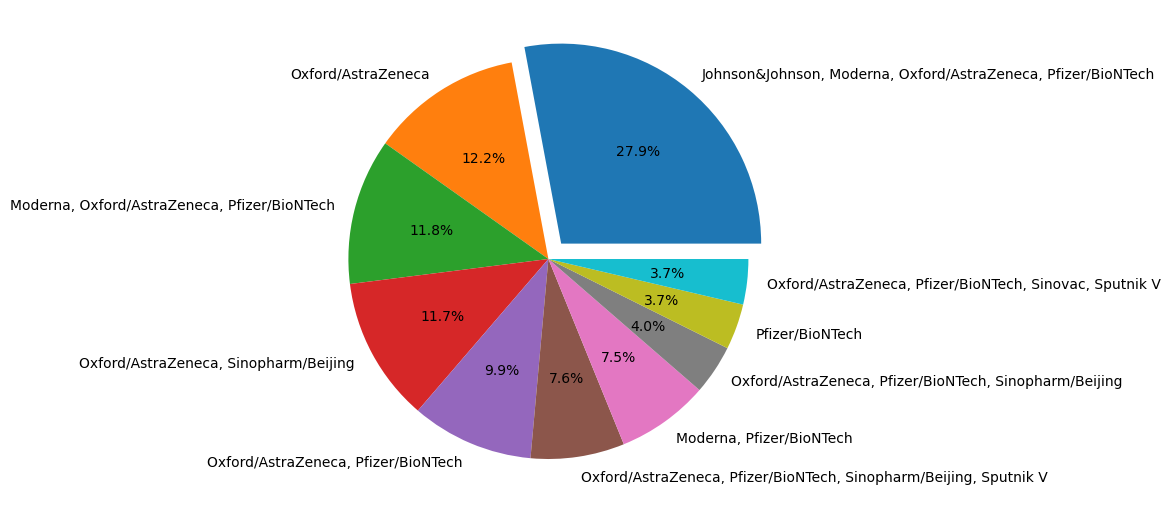

In [11]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

Примечание (для внимательных и любознательных)
Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.

→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:

1. Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода dropna(), который удаляет строки, содержащие пропуски в столбце, указанном в параметре subset(). Данный метод мы будем изучать в следующем модуле, посвящённом очистке данных — пока что не вам не стоит заострять на нём внимание:

In [12]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])


2. Полученные данные необходимо сгруппировать по странам (country) и определить последнюю зафиксированную комбинации вакцин в столбце vaccines:

In [13]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()


В результате такого преобразования мы получаем Series, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.

In [14]:
display(combination_last)


country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

3. Преобразуем данные с помощью метода apply(): применим к столбцу lambda-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.

In [15]:
combination_last = combination_last.apply(
    lambda x: x.replace(' ', '').split(','))


В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:


In [17]:
display(combination_last)


country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

4. Создадим словарь vaccines_dict={}, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.

5. Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам Series combination_last. На каждой итерации цикла в переменной цикла vaccines_list будет находиться список вакцин, которые используются в стране.

Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.

В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря vaccones_dict. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

In [18]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

6. В результате работы получаем словарь, который преобразуем в объект Series. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как 'other'. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в Series по индексу 'other'.

Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.

In [19]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]


7. Строим круговую диаграмму:

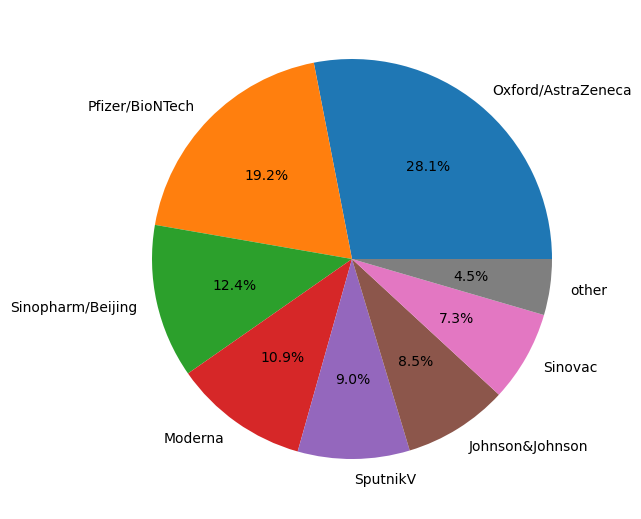

In [21]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);


## ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Вы, наверное, заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нём изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно — вы всегда сможете подсмотреть их в документации):

- [axes.set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
- [axes.set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) — название оси абсцисс;
- [axes.set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) — название оси ординат;
- [axes.set_xticks()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) — установка отметок на оси абсцисс;
- [axes.set_yticks()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html) — установка отметок на оси ординат;
- [axes.xaxis.set_tick_params()](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axis.XAxis.set_tick_params.html) — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
- [axes.yaxis.set_tick_params()](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axis.YAxis.set_tick_params.html) — управление параметрами отметок на оси ординат;
- [axes.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) — отображение легенды;
- [axes.grid()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.grid.html) — установка сетки.

Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси абсцисс откладываются значения столбца таблицы, по оси ординат — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

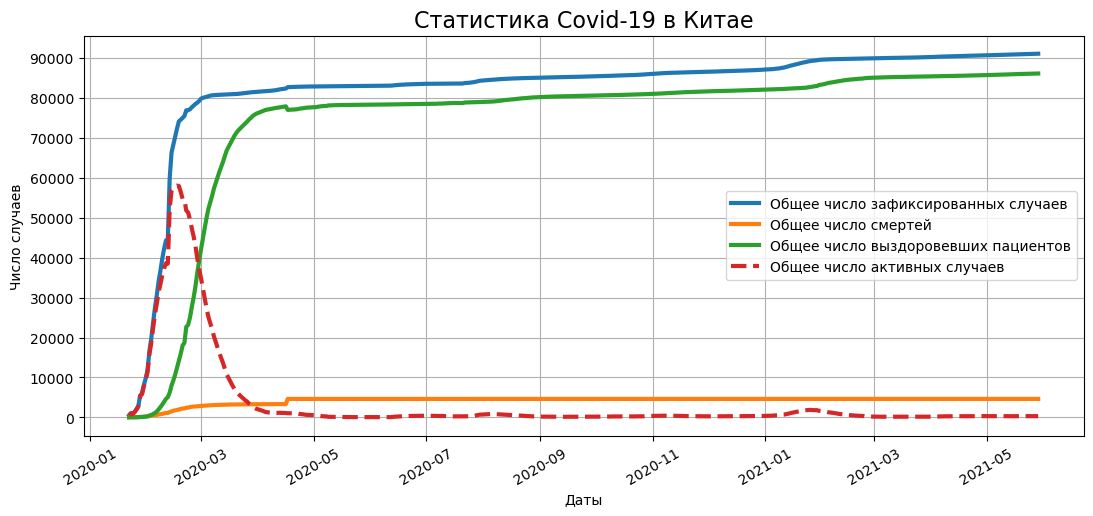

In [22]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(
    ['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'],
          label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'],
          label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'],
          label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()


## ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода [bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

Основные параметры метода bar()

- x — названия категорий, которые будут располагаться по оси абсцисс;
- height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
- width — ширина столбцов диаграммы;
- color — цвет.

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

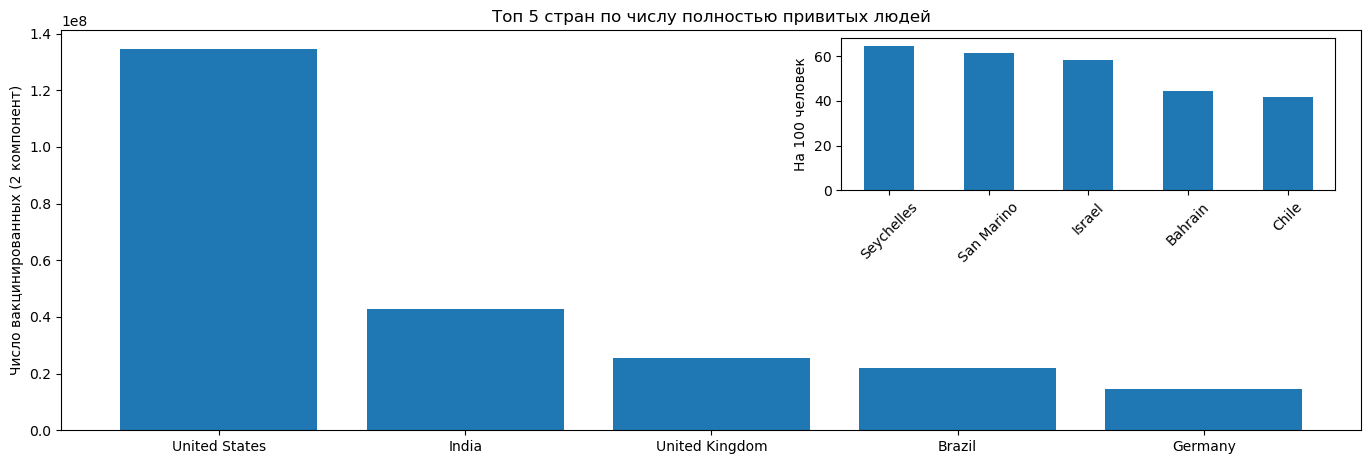

In [23]:
vacc_country = covid_df.groupby(
    'country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby(
    'country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x=vacc_country.index, height=vacc_country)
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vacc_country_per_hundred.index,
                height=vacc_country_per_hundred, width=0.5)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)


Примечание. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

## SUBPLOTS

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция [subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

Основные параметры метода subplots()

- nrows — число строк;
- ncols — число столбцов;
- figsize — общий размер фигуры в дюймах (ширина и высота).
Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:



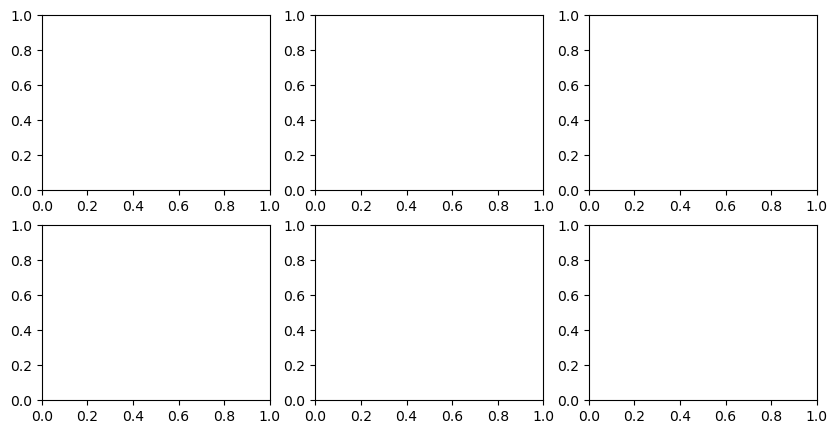

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))


Теперь, обладая знаниями о методе subplots(), построим три графика:

Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
Линейный график изменения ежедневной заболеваемости в стране.
Гистограмму ежедневной заболеваемости в стране.
За построение гистограмм в библиотеке Matplotlib отвечает метод [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html).

Основные параметры метода hist()

- x — массив чисел, для которого строится гистограмма;
- bins — число столбцов (корзин);
- orientation — ориентация гистограммы (по умолчанию 'vertical');
- color — цвет.
Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

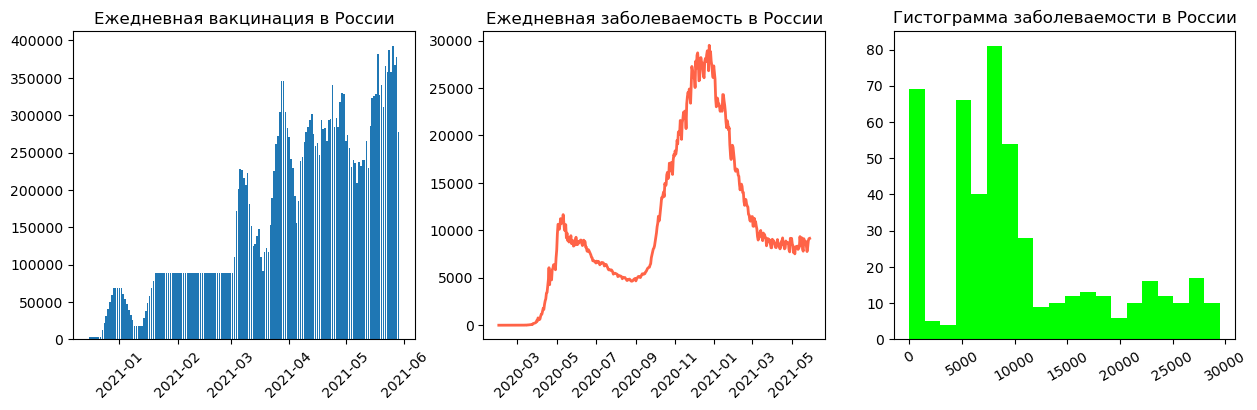

In [25]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

- На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

- На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

- Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

- На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

✍ Мы рассмотрели лишь основные графики и их настройки в библиотеке Matplotlib. На самом деле библиотека имеет гораздо больший спектр возможностей, на изучение которого не хватит даже целого курса по визуализации, — от добавления текста на диаграмму до визуализации изображений и 3D-графиков.

Если вам вдруг понадобится какая-то особенная функциональность Matplotlib, которую мы не рассматривали, рекомендуем поискать её в [документации](https://matplotlib.org/) по библиотеке.

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values.

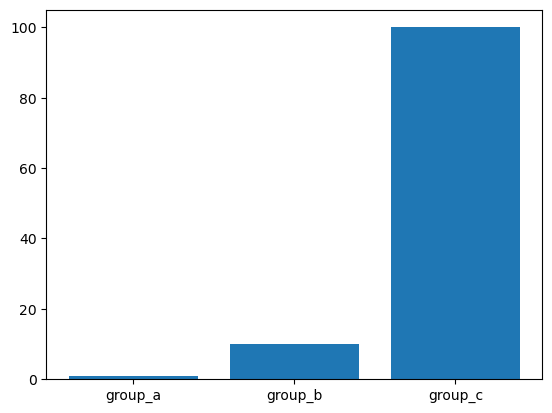

In [26]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()


И модульный, и объектно-ориентированный подходы имеют одинаковое право на существование. Ознакомьтесь со статьёй, где используется преимущественно модульный подход, и проведите параллель с изученным материалом.

А пока предлагаем вам закрепить знания, ответив на несколько вопросов ↓

### Задание 5.1
Выберите основные объекты в библиотеке Matplotlib при использовании объектно-ориентированного режима:
- Координатные плоскости и заголовки графиков
- Плоскости и поверхности
- Фигуры (холсты) и координатные плоскости верно
- Выпуклые и невыпуклые фигуры

### Задание 5.2
Соотнесите методы объекта axes и графики, которые они строят (при возникновении затруднений обратитесь к [документации](https://matplotlib.org/stable/api/axes_api.html)).

![](img/dst3-u1-md13_5_2.png)

## Задание 5.3
Соотнесите методы объекта axes и параметры, которые эти методы регулируют:

![](img/dst3-u1-md13_5_3.png)

## Задание 5.4
По какому параметру отличаются друг от друга представленные ниже графики?

![](img/dst3-u1-md13_5_9.png)

- xlim
- Источник данных
- bins верно
- ncolumns

Ответ
Верно:Гистограммы имеют одинаковый диапазон по осям x и y и отличаются только числом столбцов. За число столбцов в гистограмме отвечает именно параметр bins.


### Задание 5.5
Дан код для отрисовки основной системы координат:

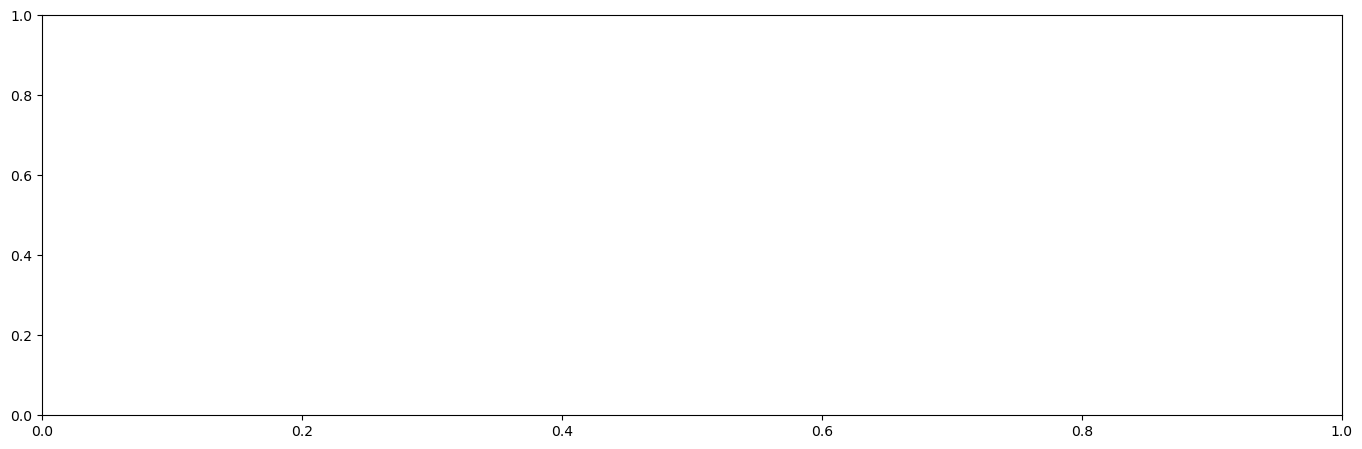

In [30]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])


Выберите правильный набор параметров, позволяющих разместить вспомогательную ось так, как показано на заготовке графика ниже.

![](img/dst3-u1-md13_5_10.png)

1. 
``` python
insert_axes = fig.add_axes([0.5, 0.5, 0.5, 0.5])
```
2. 
``` python
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])
```
3. 
``` python
insert_axes = fig.add_axes([0.6, 0.6, 0.2, 0.2])
```

Ответ: 2

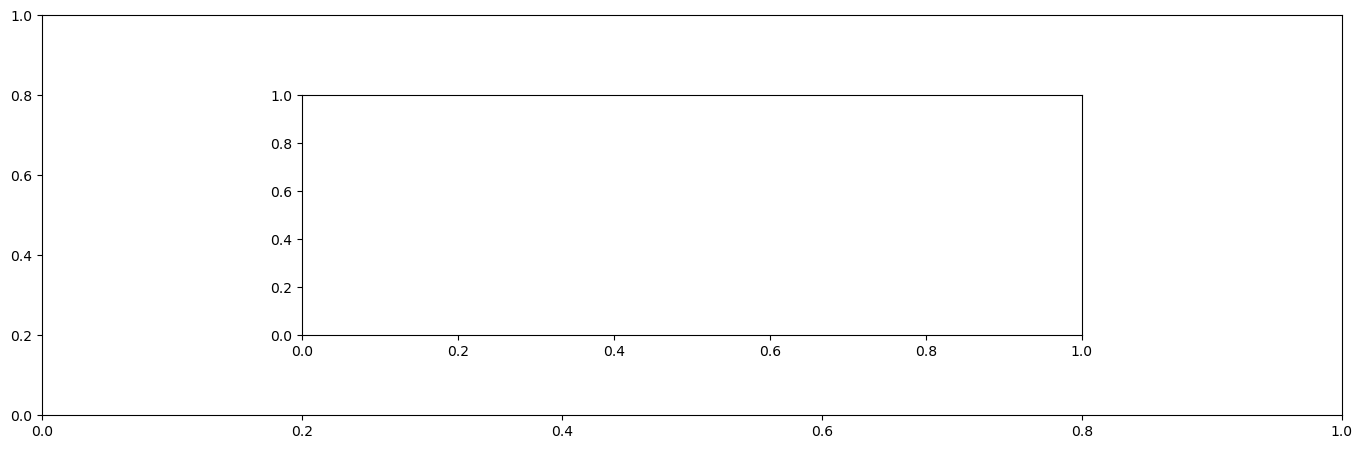

In [35]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

### Задание 5.6
Выберите вариант кода, который позволит построить приведённый ниже график (посмотрите в документации параметры объекта [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), которые позволяют раскрашивать части фигуры).

![](img/dst3-u1-md13_5_11.png)

Прежде чем заносить варианты кода в ноутбук, попробуйте определить верный вариант ответа логически.

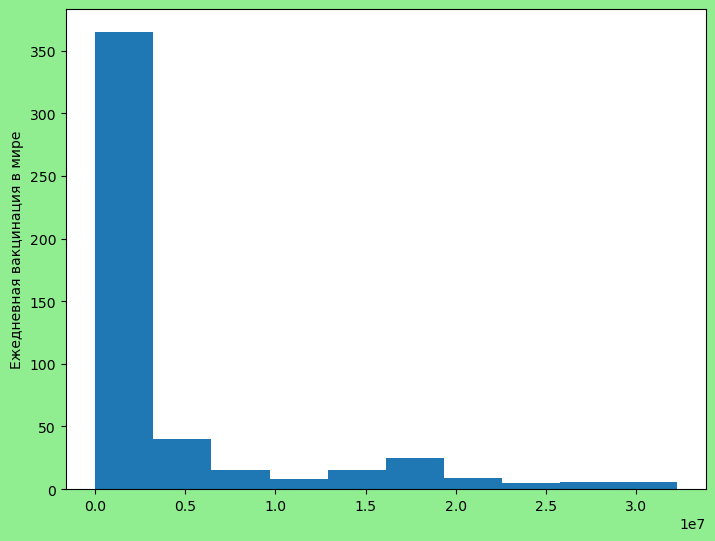

In [38]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

### Задание 5.7
Какое название лучше всего подойдёт графику, который строит код ниже?

``` python
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)
```

- ТОП-5 стран по числу заболевших на 1 млн человек
- ТОП-5 стран с наименьшими показателями летальности
- ТОП-5 стран по общему числу сделанных прививок верно
- ТОП-5 стран по средней ежедневной вакцинации на 1 млн человек

### Задание 5.8
Подумайте (или посмотрите в [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)), по каким индексам надо обратиться к списку осей axes, полученному с помощью метода subplots(), чтобы построить такой график:

![](img/dst3-u1-md13_5_12.png)

- axes[3][2]
- axes[1, 2] верно
- axes[2][1]
- axes[1][2]

